In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.signal import savgol_filter, find_peaks

In [ ]:
df = pd.read_csv("drive/MyDrive/project_csv_data/gait_Janvi_1_2.csv")
df.head()

,y,timestamps
0,10.69,173736
1,10.46,173758
2,10.56,173780
3,10.89,173802
4,11.48,173824


In [ ]:
# # Step 2: Preprocessing
# def butter_lowpass(cutoff, fs, order=5):
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     return b, a

# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = filtfilt(b, a, data)
#     return y

# # Choose cutoff frequency and filter the magnitude data
# cutoff_frequency = 7.0  # Adjust as needed
# fs = 85.0  # Sample rate (assuming timestamps are in milliseconds)
# df['mag_filtered'] = butter_lowpass_filter(df['mag'], cutoff_frequency, fs)

In [ ]:
# Step 2: Preprocessing with Savitzky-Golay filter
window_length = 21  # Adjust the window length as needed
polyorder = 3  # Adjust the polynomial order as needed

df['mag_filtered'] = savgol_filter(df['y'], window_length, polyorder)

<Axes: >

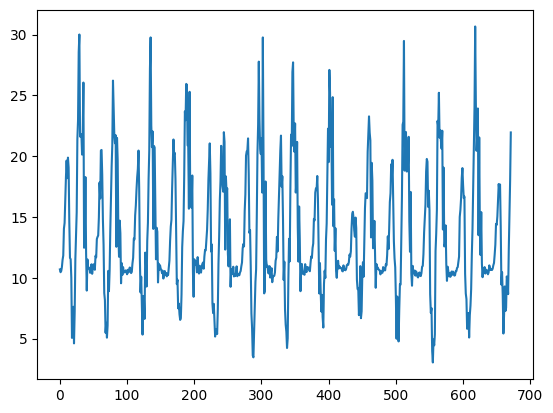

In [ ]:
df.y.plot()

<Axes: >

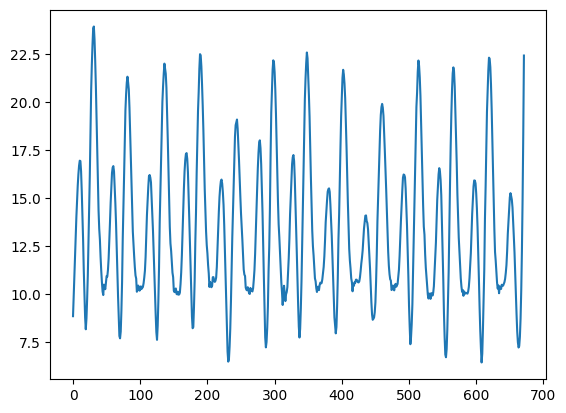

In [ ]:
df.mag_filtered.plot()

In [ ]:
# Step 3: Peak Detection
# Find local peaks in the filtered magnitude data
peaks, _ = find_peaks(df['mag_filtered'], height=14, distance=50)  # Adjust the height threshold as needed

print(peaks)
# Step 4: Normalization
# Identify key events (heel strikes and toe-offs)
heel_strike_timestamps = df.iloc[peaks]['timestamps']
gait_cycle_duration = np.diff(heel_strike_timestamps)

print(gait_cycle_duration)

[ 31  81 136 189 244 298 348 402 460 514 566 619]
[1098 1207 1166 1210 1188 1100 1185 1276 1184 1141 1166]


In [ ]:
df['gait_phase'] = 0

# Normalize the gait cycle by dividing by its duration
for i in range(len(heel_strike_timestamps) - 1):
    cycle_start = heel_strike_timestamps.iloc[i]
    cycle_end = heel_strike_timestamps.iloc[i + 1]
    mask = (df['timestamps'] >= cycle_start) & (df['timestamps'] <= cycle_end)
    df.loc[mask, 'gait_phase'] = ((df['timestamps'][mask] - cycle_start) / (cycle_end - cycle_start)) * 100

# Handle the last gait cycle separately
last_cycle_start = heel_strike_timestamps.iloc[-1]
last_cycle_end = heel_strike_timestamps.iloc[-1] + gait_cycle_duration[-1]
mask = (df['timestamps'] >= last_cycle_start) & (df['timestamps'] <= last_cycle_end)
df.loc[mask, 'gait_phase'] = ((df['timestamps'][mask] - last_cycle_start) / (last_cycle_end - last_cycle_start)) * 100

In [ ]:
df.gait_phase

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
667    90.566038
668    92.452830
669    94.339623
670    96.226415
671    98.113208
Name: gait_phase, Length: 672, dtype: float64

<Axes: >

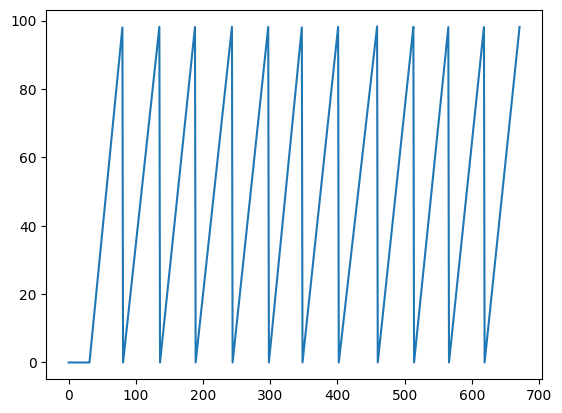

In [ ]:
df.gait_phase.plot()

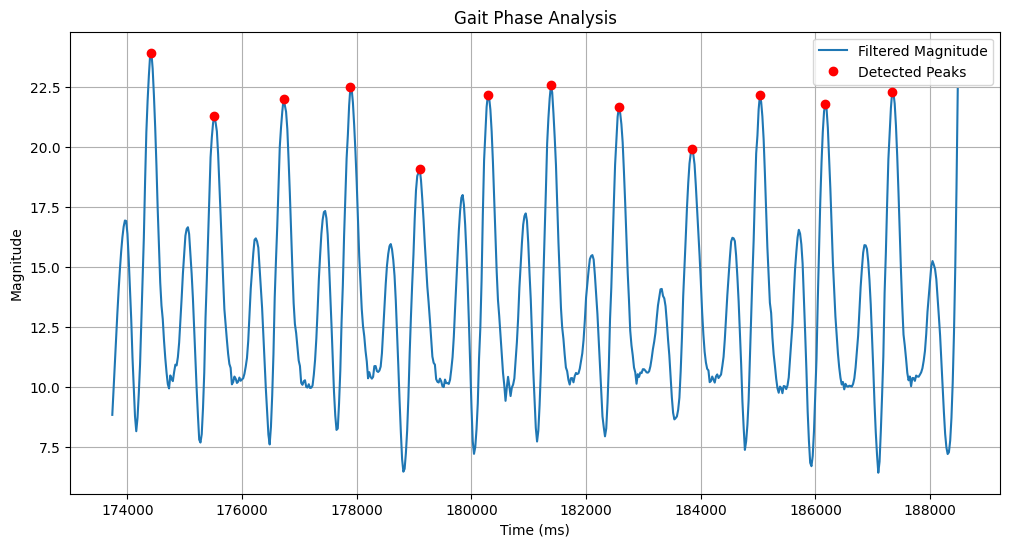

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['timestamps'], df['mag_filtered'], label='Filtered Magnitude')
plt.plot(df.iloc[peaks]['timestamps'], df.iloc[peaks]['mag_filtered'], 'ro', label='Detected Peaks')
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.legend()
plt.title('Gait Phase Analysis')
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Average Gait Phase Cycle
average_gait_phase_cycle = df.groupby('gait_phase').mean()
average_gait_phase_cycle.reset_index(inplace=True)

In [ ]:
print(average_gait_phase_cycle)

     gait_phase          y     timestamps  mag_filtered
0      0.000000  16.824884  175961.139535     16.399542
1      1.724138  20.770000  182594.000000     21.431677
2      1.818182  20.890000  177911.000000     22.423880
3      1.822701  21.060000  175538.000000     21.019274
4      1.851852  21.170000  179121.000000     18.603655
..          ...        ...            ...           ...
515   98.143460  27.090000  182550.000000     21.257986
516   98.148148  23.030000  180265.000000     21.666711
517   98.177299  29.760000  176701.000000     21.478938
518   98.181818  17.080000  179077.000000     18.939984
519   98.275862  21.840000  183826.000000     19.732161

[520 rows x 4 columns]


<Axes: >

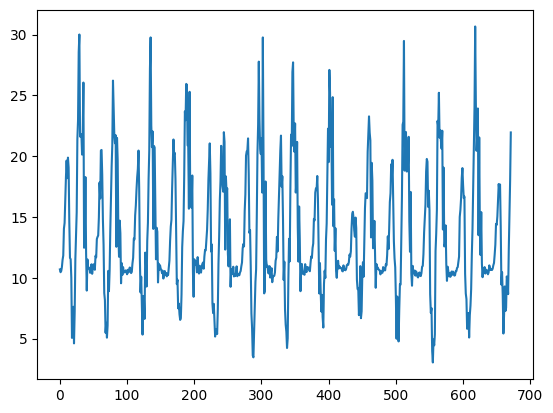

In [ ]:
df.y.plot()

<Axes: >

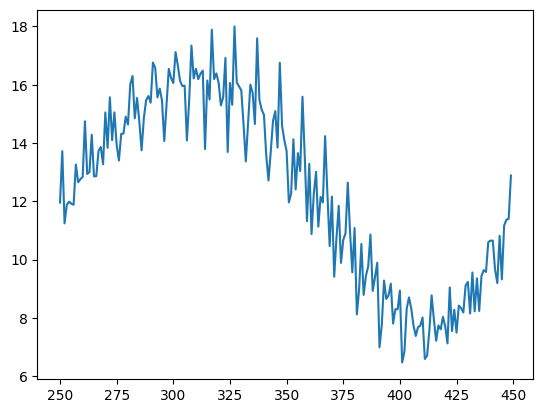

In [ ]:
average_gait_phase_cycle.mag_filtered.iloc[250:450].plot()

In [ ]:
smoothen_cycle = average_gait_phase_cycle.mag_filtered.iloc[250:460].rolling(window=10).mean()

<Axes: >

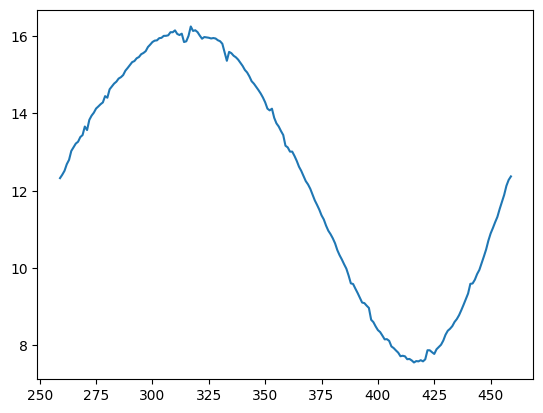

In [ ]:
smoothen_cycle.plot()